#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb

#Data Collection


In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
print("df.shape -->", data.shape)
print("Rows     -->", data.shape[0])
print("Columns  -->", data.shape[1])

df.shape --> (918, 12)
Rows     --> 918
Columns  --> 12


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
data['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

In [ ]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
data['RestingBP'].unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

In [ ]:
data['Cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
data['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [ ]:
data['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
data['FastingBS'].unique()

array([0, 1])

In [ ]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
data['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

In [ ]:
data['MaxHR'].unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

In [ ]:
data['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
data['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

In [ ]:
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [ ]:
data['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
data['HeartDisease'].unique()

array([0, 1])

In [ ]:
data.max()

Age                77
Sex                 M
ChestPainType      TA
RestingBP         200
Cholesterol       603
FastingBS           1
RestingECG         ST
MaxHR             202
ExerciseAngina      Y
Oldpeak           6.2
ST_Slope           Up
HeartDisease        1
dtype: object

In [ ]:
data.mean()

<ipython-input-33-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

# Data Cleaning

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
df1 =data.select_dtypes(exclude=object)
df2 = data.select_dtypes(include=object)
df3= df1.drop('HeartDisease',axis=1)

In [ ]:
df1.dtypes

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object

In [ ]:
df2.dtypes

Sex               object
ChestPainType     object
RestingECG        object
ExerciseAngina    object
ST_Slope          object
dtype: object

In [ ]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- in RestingBP column the Hypotension is abnormally low blood pressure (lower than 90/60 mm Hg). If your blood pressure gets too low, it can cause dizziness, fainting or death.

- Deleting the row containing 0 value



In [ ]:
df1[df1['RestingBP']==0]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
449,55,0,0,0,155,1.5,1


In [ ]:
df1.drop(index=df1[df1['RestingBP']==0].index,inplace=True)

#Data Processing


converting the the objects values to numericsl in the df2 dataframes which cntains only objects

In [ ]:
for i in range(0,df2.shape[1]):
    df2.iloc[:,i] = le.fit_transform(df2.iloc[:,i])

<ipython-input-42-816679954db3>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i] = le.fit_transform(df2.iloc[:,i])
<ipython-input-42-816679954db3>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df2.iloc[:,i] = le.fit_transform(df2.iloc[:,i])
<ipython-input-42-816679954db3>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iset

In [ ]:
df2.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


Now making the final data frame by combinig the the df1 data frame and the new df2 data frame with values converted to integral values

In [ ]:
df = pd.concat([df1,df2],axis=1)

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40.0,140.0,289.0,0.0,172.0,0.0,0.0,1,1,1,0,2
1,49.0,160.0,180.0,0.0,156.0,1.0,1.0,0,2,1,0,1
2,37.0,130.0,283.0,0.0,98.0,0.0,0.0,1,1,2,0,2
3,48.0,138.0,214.0,0.0,108.0,1.5,1.0,0,0,1,1,1
4,54.0,150.0,195.0,0.0,122.0,0.0,0.0,1,2,1,0,2


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isna().sum()

Age               1
RestingBP         1
Cholesterol       1
FastingBS         1
MaxHR             1
Oldpeak           1
HeartDisease      1
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

dropping values whic hare not a number in the new data frame

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

Age               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
HeartDisease      0
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [ ]:
df.shape

(917, 12)

In [ ]:
df.mean()

Age                53.509269
RestingBP         132.540894
Cholesterol       199.016358
FastingBS           0.233370
MaxHR             136.789531
Oldpeak             0.886696
HeartDisease        0.552890
Sex                 0.789531
ChestPainType       0.779716
RestingECG          0.989095
ExerciseAngina      0.404580
ST_Slope            1.362050
dtype: float64

In [ ]:
df.max()

Age                77.0
RestingBP         200.0
Cholesterol       603.0
FastingBS           1.0
MaxHR             202.0
Oldpeak             6.2
HeartDisease        1.0
Sex                 1.0
ChestPainType       3.0
RestingECG          2.0
ExerciseAngina      1.0
ST_Slope            2.0
dtype: float64

In [ ]:
df.min()

Age               28.0
RestingBP         80.0
Cholesterol        0.0
FastingBS          0.0
MaxHR             60.0
Oldpeak           -2.6
HeartDisease       0.0
Sex                0.0
ChestPainType      0.0
RestingECG         0.0
ExerciseAngina     0.0
ST_Slope           0.0
dtype: float64

In [ ]:
df.median()

Age                54.0
RestingBP         130.0
Cholesterol       223.0
FastingBS           0.0
MaxHR             138.0
Oldpeak             0.6
HeartDisease        1.0
Sex                 1.0
ChestPainType       0.0
RestingECG          1.0
ExerciseAngina      0.0
ST_Slope            1.0
dtype: float64

In [ ]:
df.std()

Age                 9.437636
RestingBP          17.999749
Cholesterol       109.246330
FastingBS           0.423206
MaxHR              25.467129
Oldpeak             1.066960
HeartDisease        0.497466
Sex                 0.407864
ChestPainType       0.956193
RestingECG          0.632016
ExerciseAngina      0.491078
ST_Slope            0.607270
dtype: float64

In [ ]:
df.isnull().sum()

Age               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
HeartDisease      0
Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890,0.789531,0.779716,0.989095,0.404580,1.36205
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466,0.407864,0.956193,0.632016,0.491078,0.60727
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    float64
 1   RestingBP       917 non-null    float64
 2   Cholesterol     917 non-null    float64
 3   FastingBS       917 non-null    float64
 4   MaxHR           917 non-null    float64
 5   Oldpeak         917 non-null    float64
 6   HeartDisease    917 non-null    float64
 7   Sex             917 non-null    int64  
 8   ChestPainType   917 non-null    int64  
 9   RestingECG      917 non-null    int64  
 10  ExerciseAngina  917 non-null    int64  
 11  ST_Slope        917 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 93.1 KB


#Visualiation before Handling Outliers

## Histograms

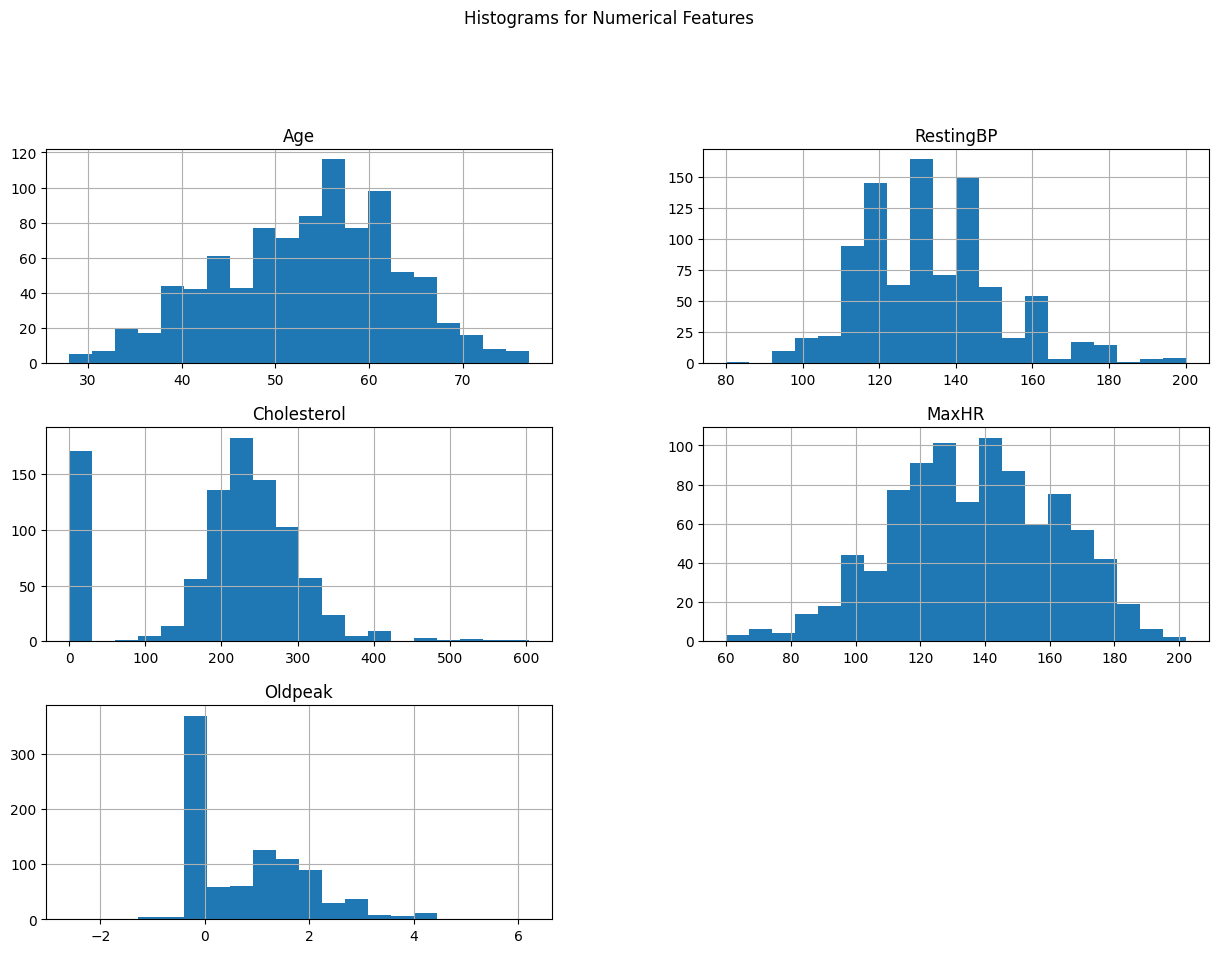

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features', y=1.02)
plt.show()

## Box Plot

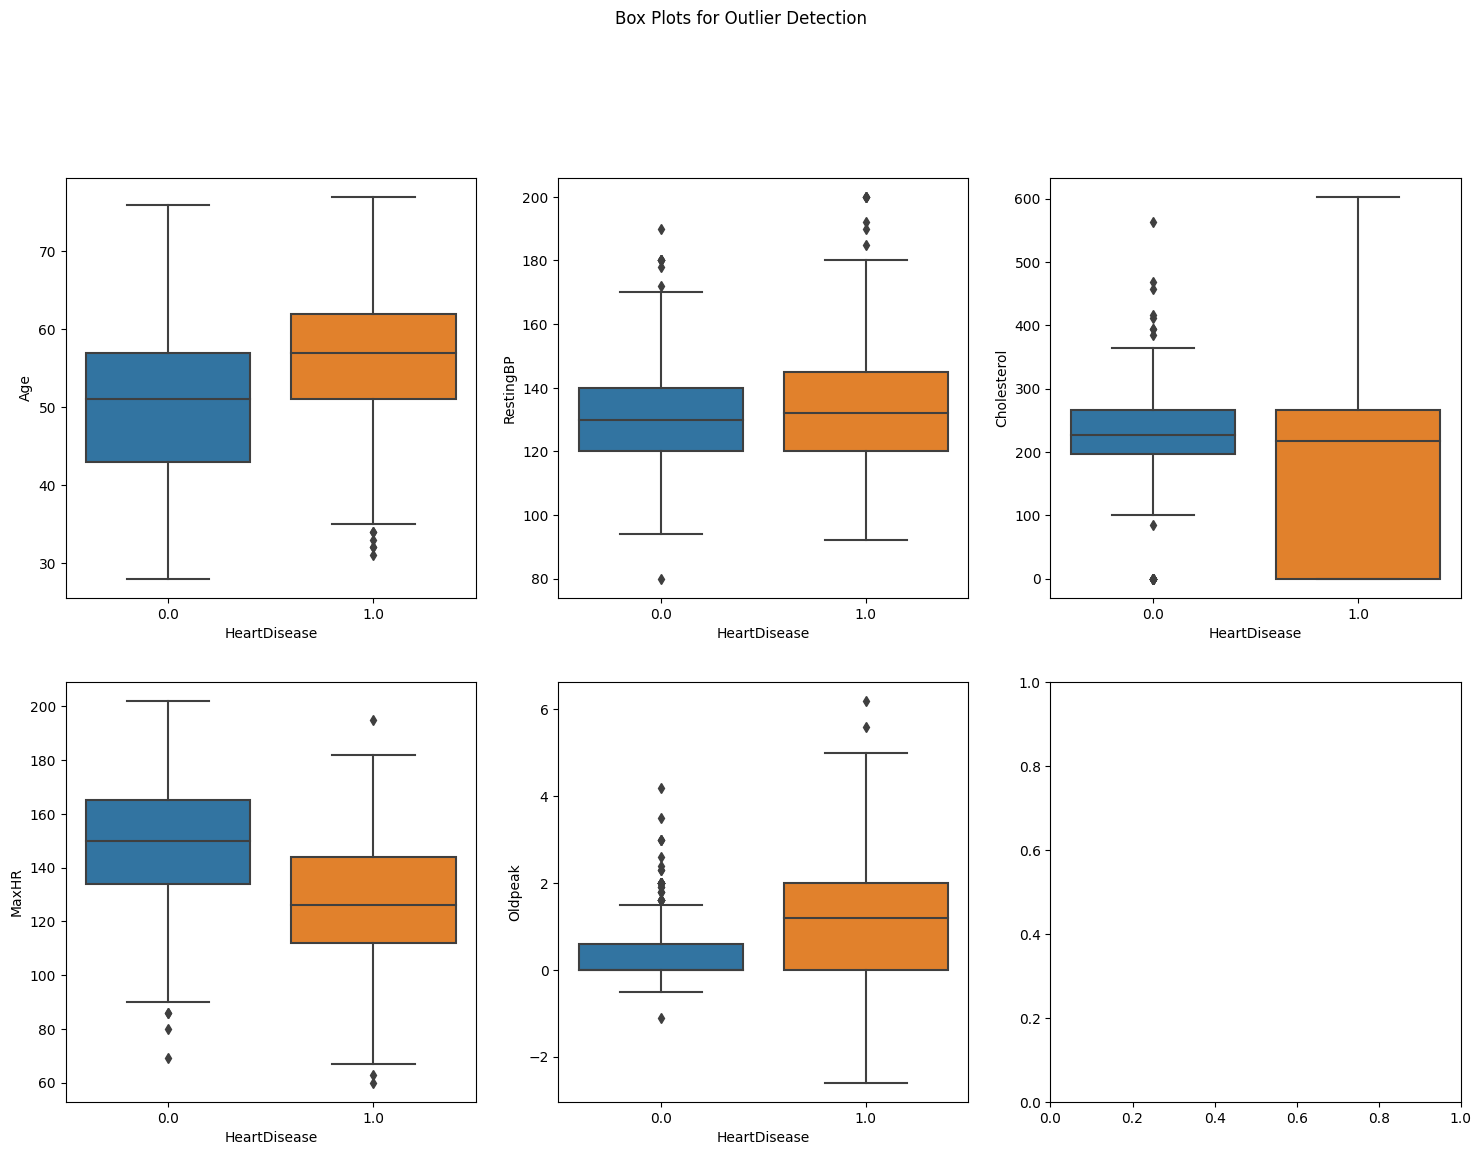

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='HeartDisease', y=feature, data=df, ax=axes[i//3, i%3])
plt.suptitle('Box Plots for Outlier Detection', y=1.02)
plt.show()

#Handling Outliers

In [ ]:
columns_to_check = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Function to handle outliers using Z-score
def handle_outliers_zscore(data, columns):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    data_no_outliers = data[(z_scores < 3).all(axis=1)]  # Keep rows where all z-scores are less than 3
    return data_no_outliers

# Function to handle outliers using IQR (Interquartile Range)
def handle_outliers_iqr(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[~((data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_no_outliers

# Use one of the functions to handle outliers
df_no_outliers = handle_outliers_zscore(df, columns_to_check)

# Standardize the features (optional but recommended)
scaler = StandardScaler()
df_no_outliers[columns_to_check] = scaler.fit_transform(df_no_outliers[columns_to_check])

# Now df_no_outliers contains the data without outliers

<ipython-input-61-724158030e32>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[columns_to_check] = scaler.fit_transform(df_no_outliers[columns_to_check])


In [ ]:
df_no_outliers.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,-1.428154,0.465900,0.849636,0.0,1.384320,-0.855469,0.0,1,1,1,0,2
1,-0.475855,1.634714,-0.168122,0.0,0.752973,0.137516,1.0,0,2,1,0,1
2,-1.745588,-0.118507,0.793612,0.0,-1.535661,-0.855469,0.0,1,1,2,0,2
3,-0.581666,0.349019,0.149344,0.0,-1.141069,0.634008,1.0,0,0,1,1,1
4,0.053200,1.050307,-0.028064,0.0,-0.588640,-0.855469,0.0,1,2,1,0,2


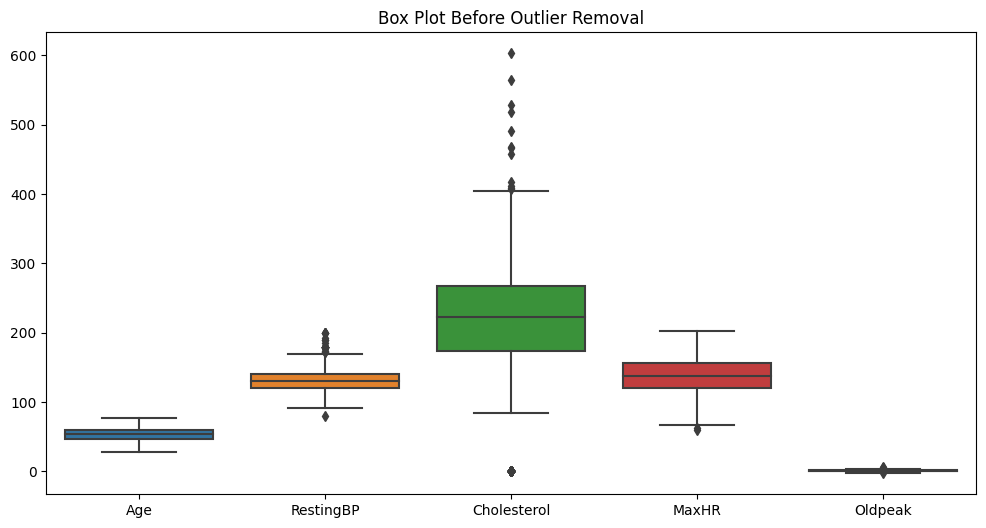

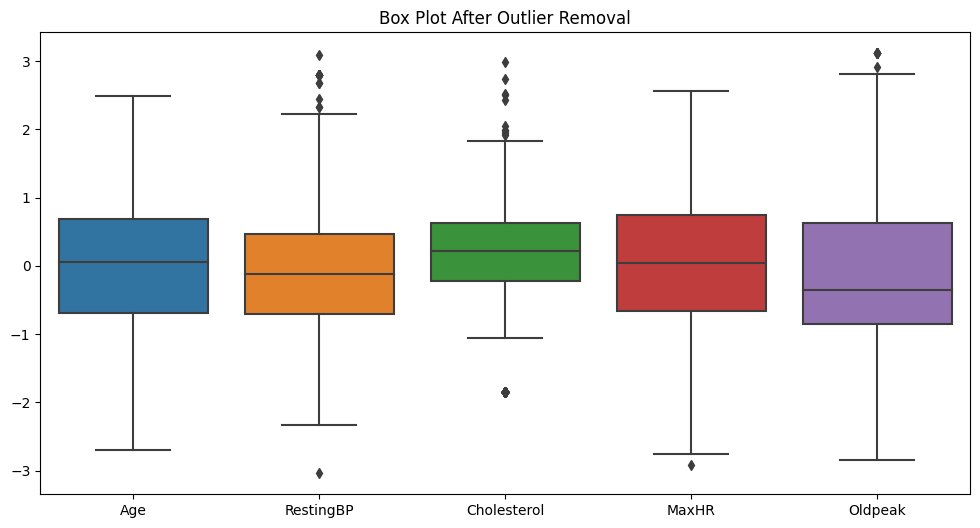

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_check])
plt.title('Box Plot Before Outlier Removal')
plt.show()

# Box plot after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers[columns_to_check])
plt.title('Box Plot After Outlier Removal')
plt.show()

#Visualiation after Handling Outliers



## Histograms

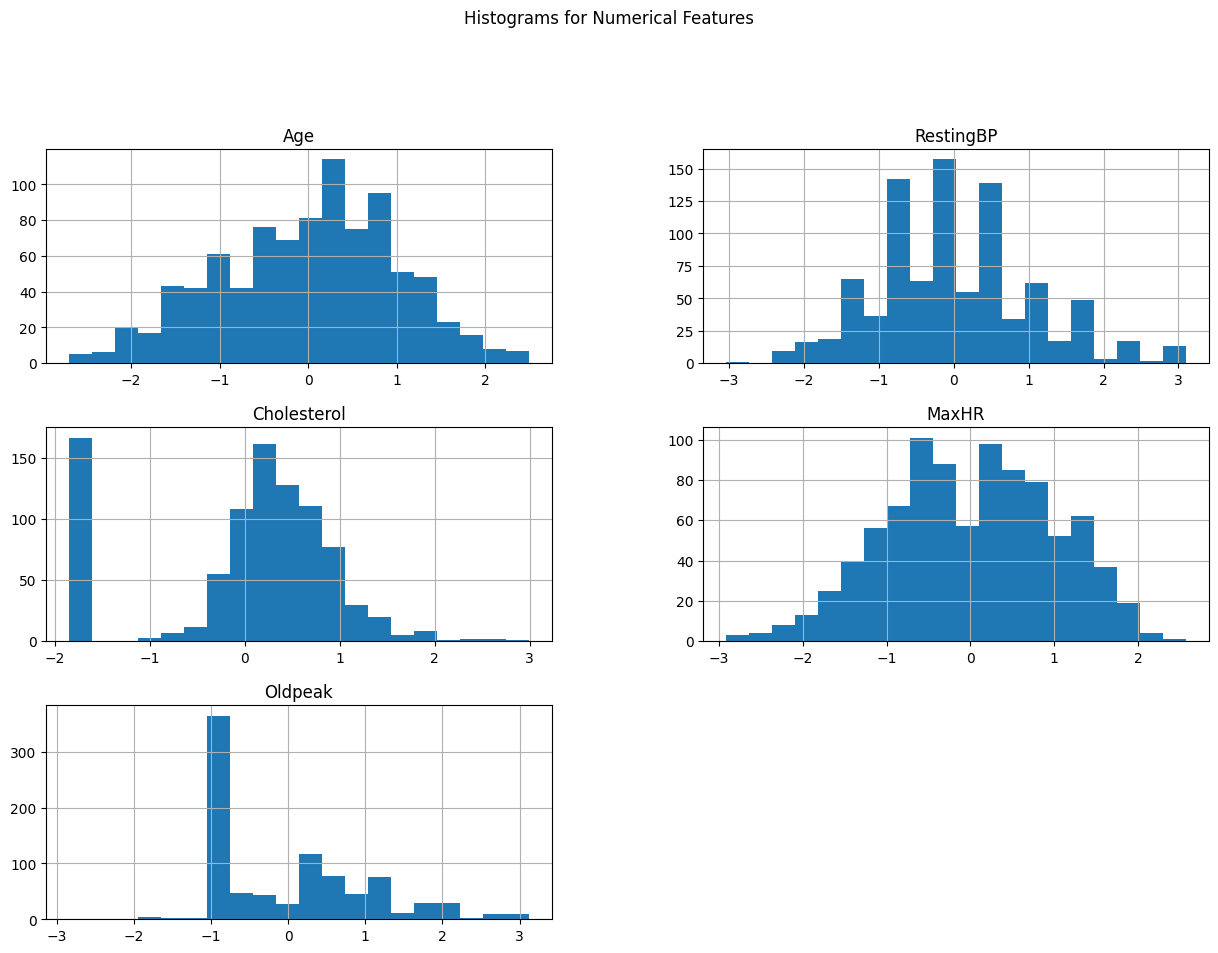

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_no_outliers[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features', y=1.02)
plt.show()

## Count Plots

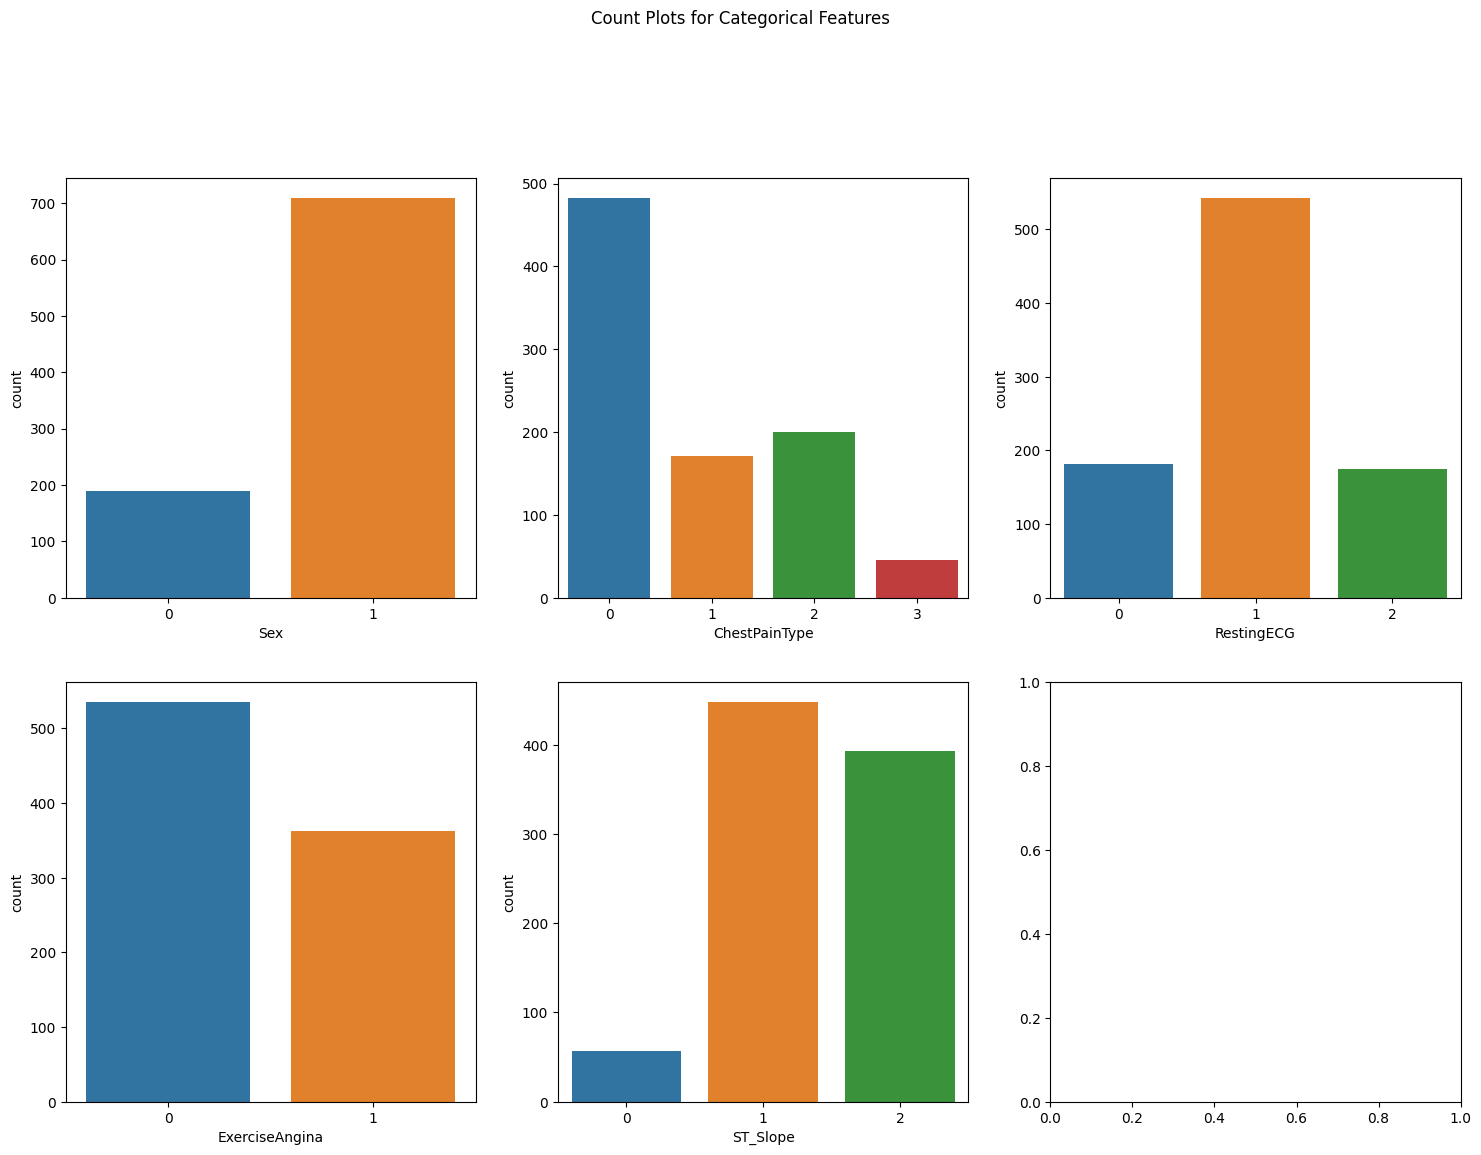

In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df_no_outliers, ax=axes[i//3, i%3])
plt.suptitle('Count Plots for Categorical Features', y=1.02)
plt.show()

## Correlation Matrix Heatmap

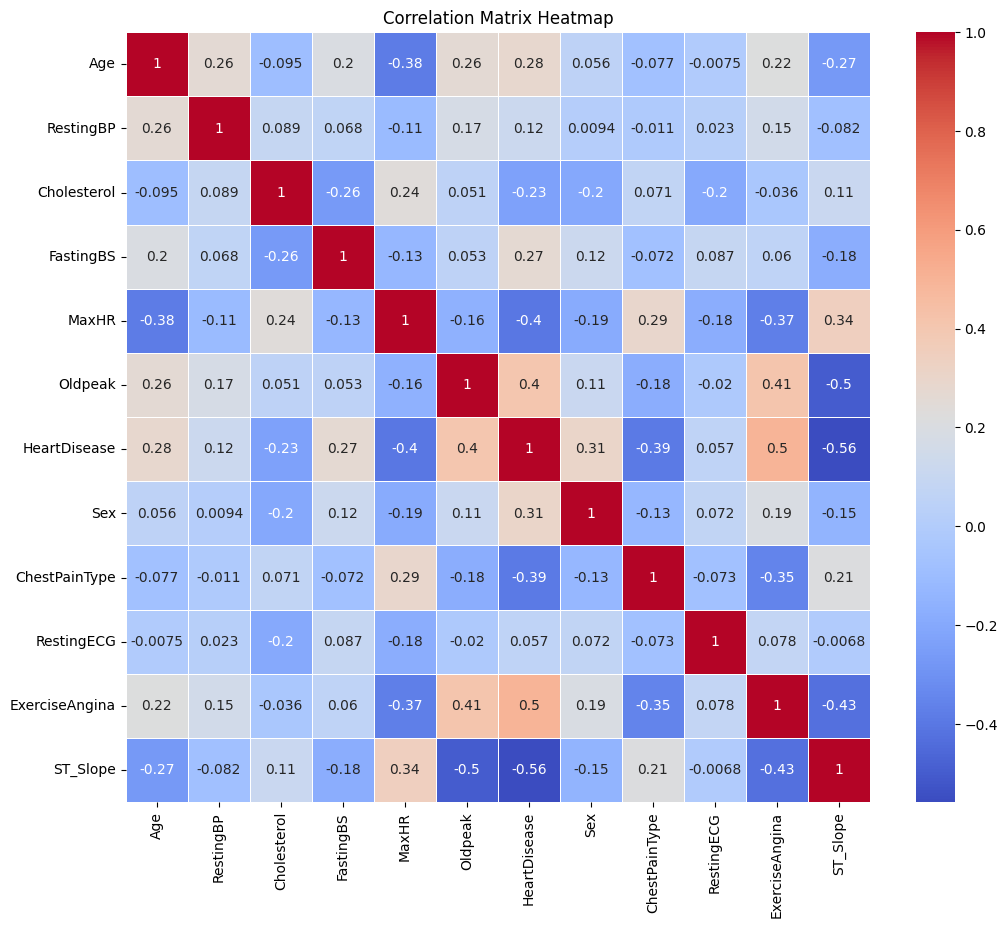

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Box Plot

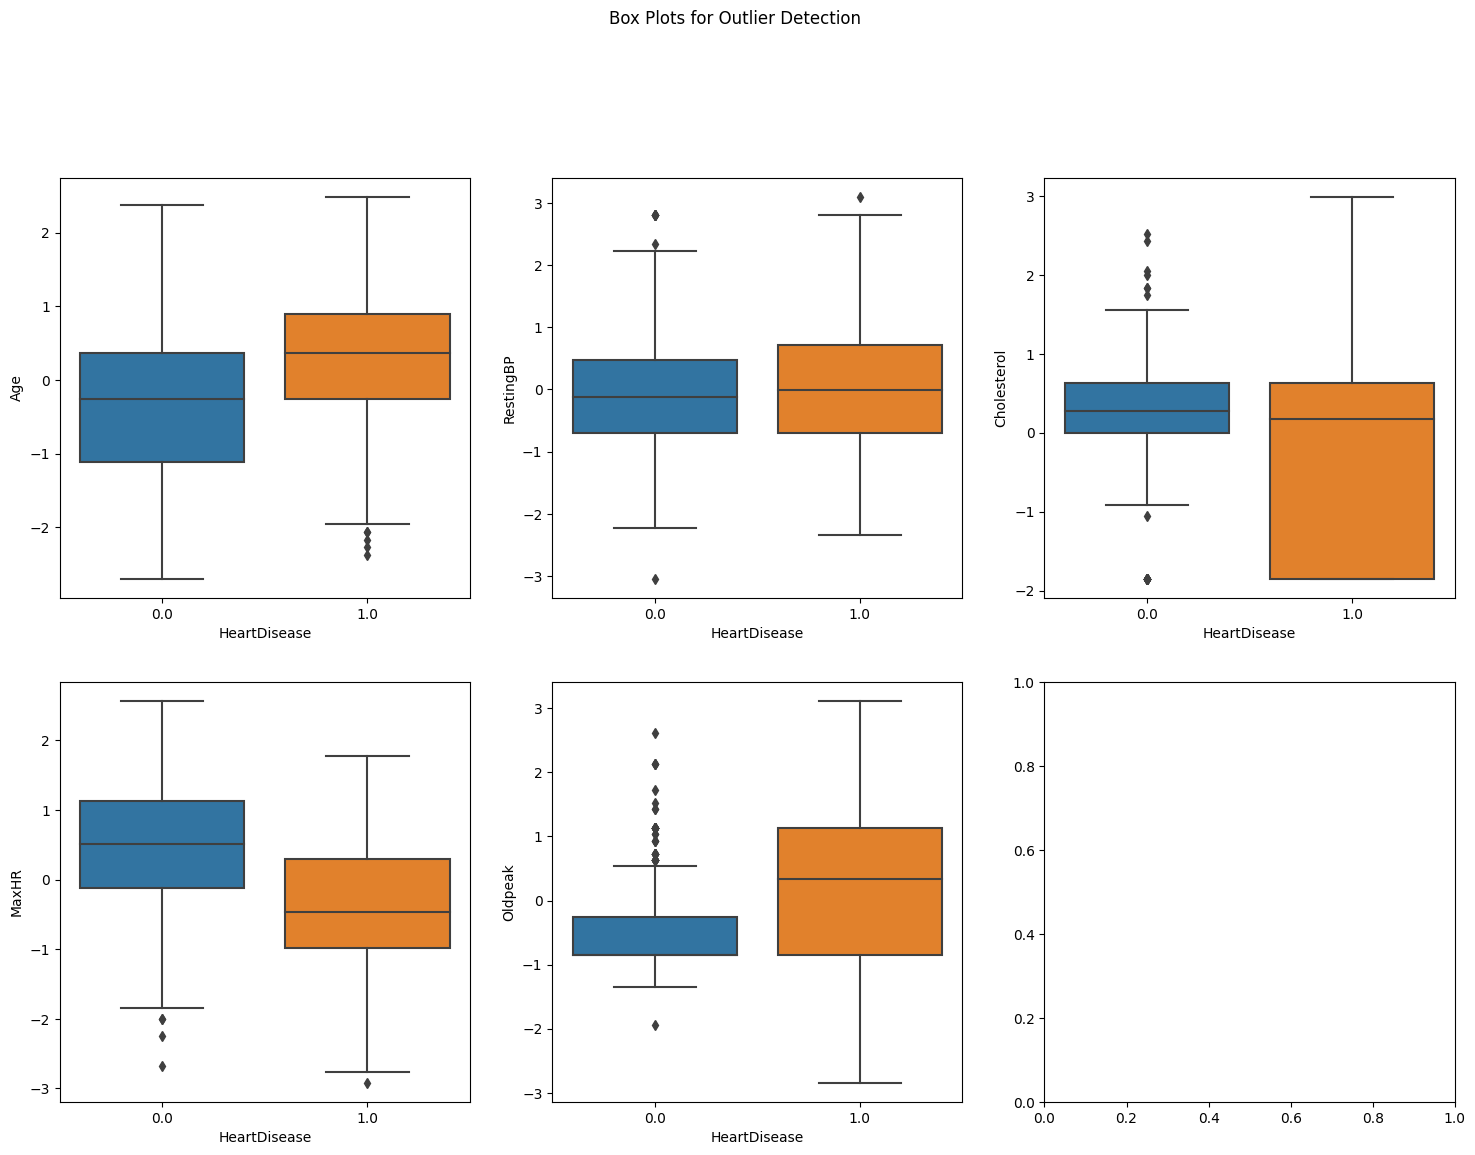

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='HeartDisease', y=feature, data=df_no_outliers, ax=axes[i//3, i%3])
plt.suptitle('Box Plots for Outlier Detection', y=1.02)
plt.show()

## Pair Plot

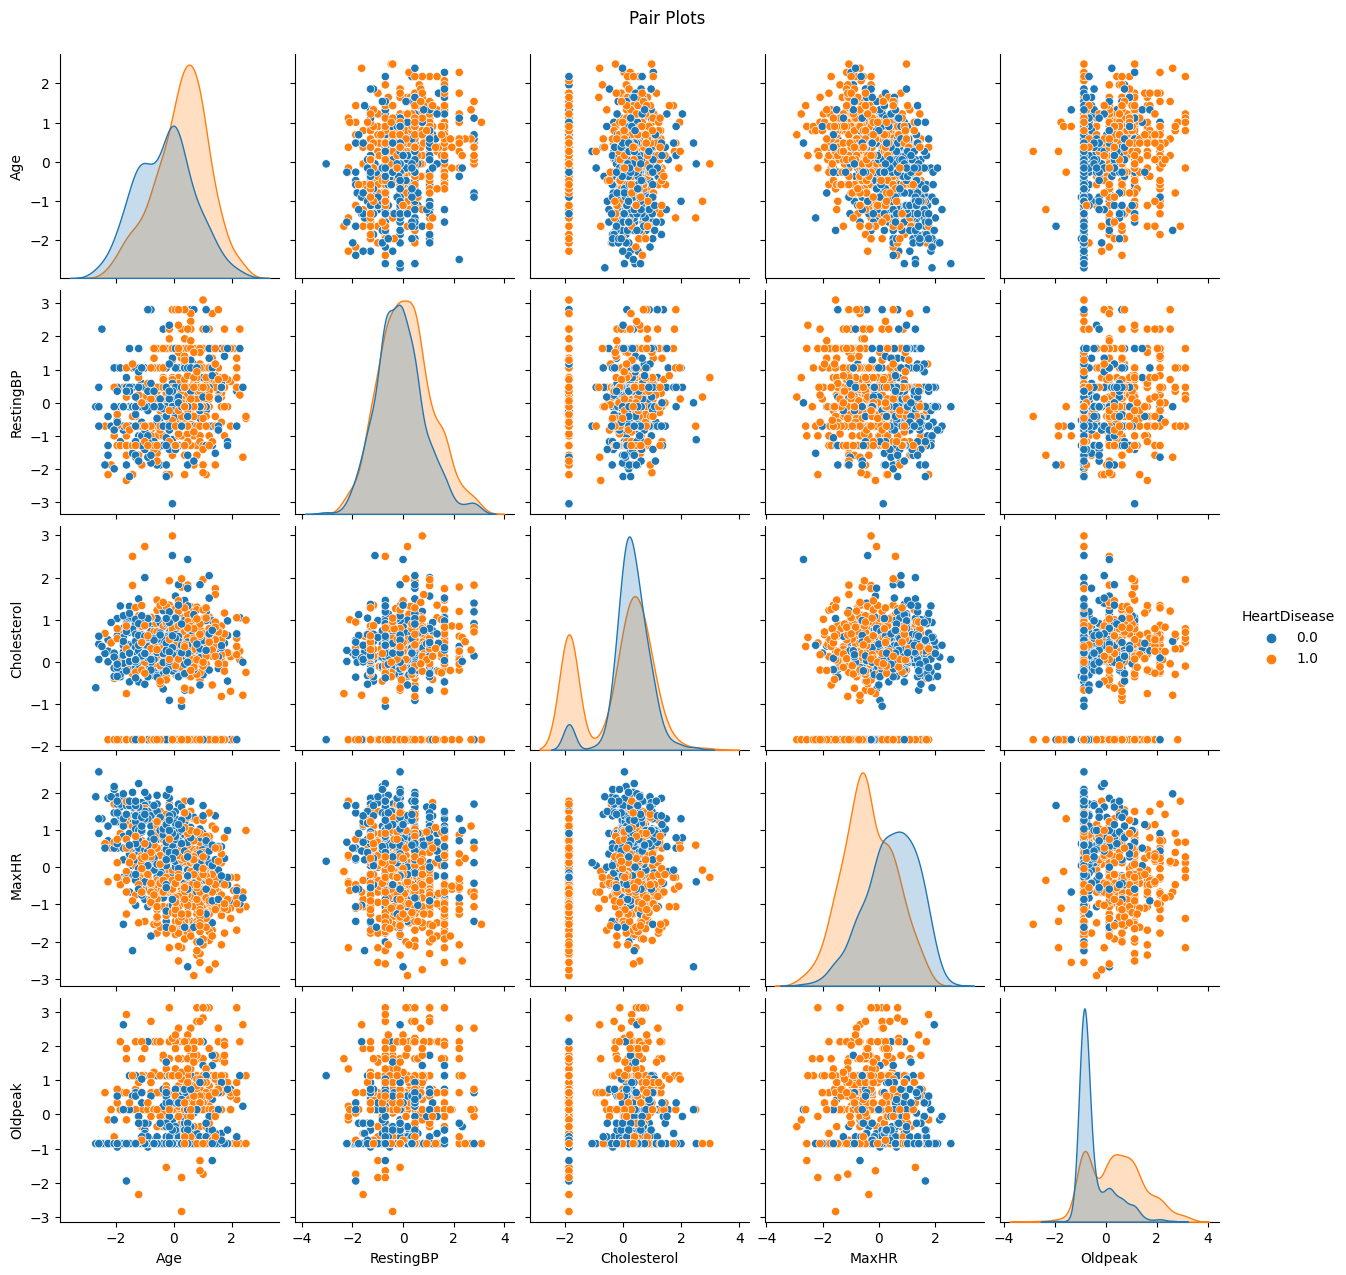

In [ ]:
sns.pairplot(df_no_outliers[numerical_features + ['HeartDisease']], hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pair Plots', y=1.02)
plt.show()

## Pie Chart

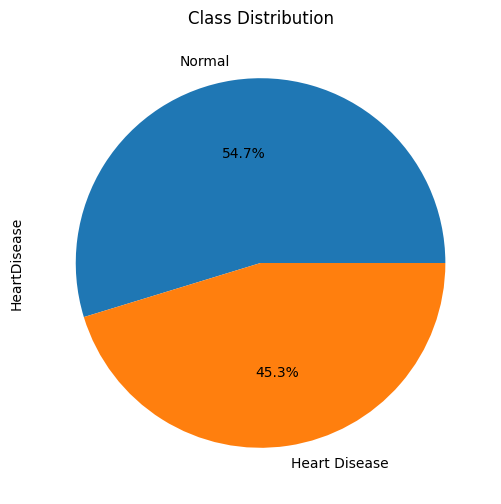

In [ ]:
plt.figure(figsize=(6, 6))
df_no_outliers['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Normal', 'Heart Disease'])
plt.title('Class Distribution')
plt.show()

## Bar Plot

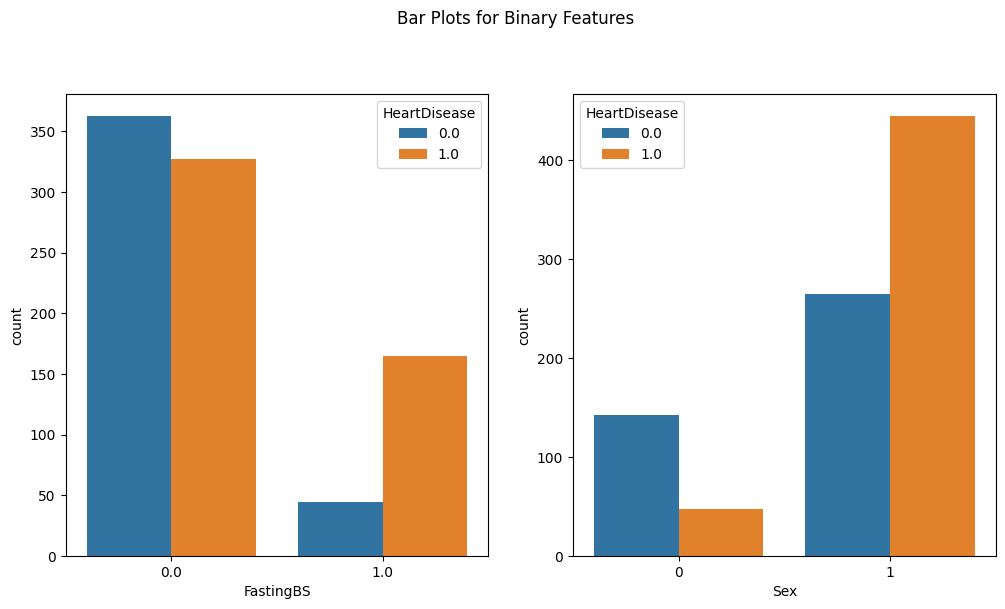

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
for i, feature in enumerate(['FastingBS', 'Sex']):
    sns.countplot(x=feature, hue='HeartDisease', data=df_no_outliers, ax=axes[i])
plt.suptitle('Bar Plots for Binary Features', y=1.02)
plt.show()

# Classification


---



---
### Test size = 0.5


In [ ]:
X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


### Linear Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

Accuracy = 77.33 %
Precision: 71.79375359815774 %
Recall: 77.33333333333333 %
F1 Score: 74.38460798460798 %


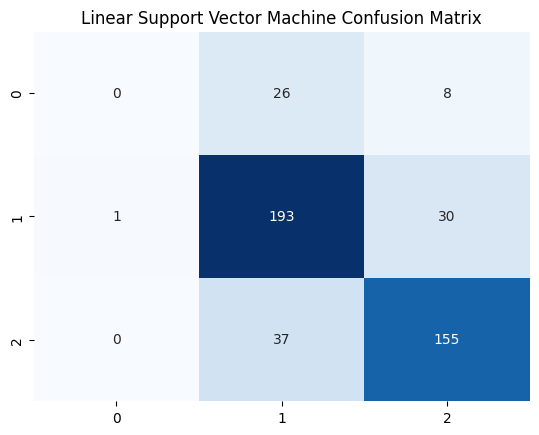

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

print('Accuracy =', svm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Linear Support Vector Machine Confusion Matrix')
plt.show()

### Kernel Support Vector Machine

In [ ]:
svm_kernel = SVC(kernel='rbf')
svm_kernel.fit(X_train,y_train)

SVC()

Accuracy = 76.89 %
Precision: 79.90515683147262 %
Recall: 76.88888888888889 %
F1 Score: 73.84256859259749 %


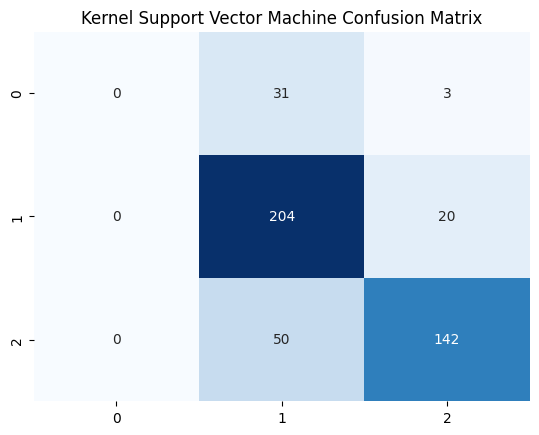

In [ ]:
y_pred = svm_kernel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_k_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', svm_k_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Kernel Support Vector Machine Confusion Matrix')
plt.show()

### Naive Byes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy = 76.44 %
Precision: 74.67523305618543 %
Recall: 76.44444444444444 %
F1 Score: 73.84014254804633 %


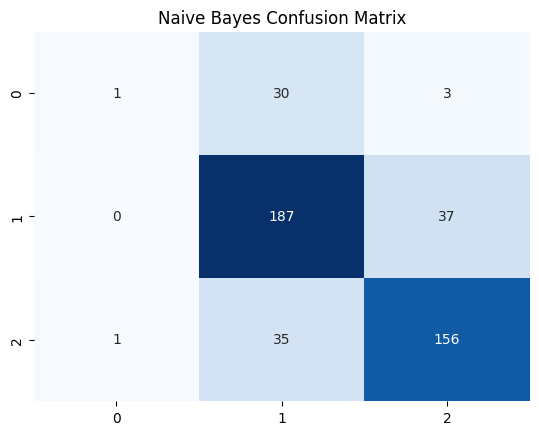

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', nb_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy = 70.22 %
Precision: 68.76966213297074 %
Recall: 70.22222222222221 %
F1 Score: 69.43006226186604 %


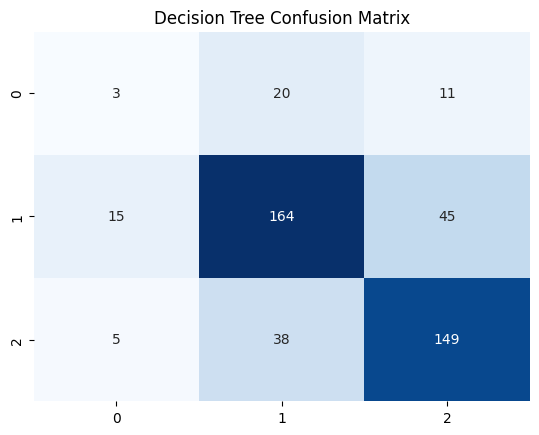

In [ ]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', tree_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Accuracy = 78.22 %
Precision: 73.67897029815374 %
Recall: 78.22222222222223 %
F1 Score: 75.20932641345189 %


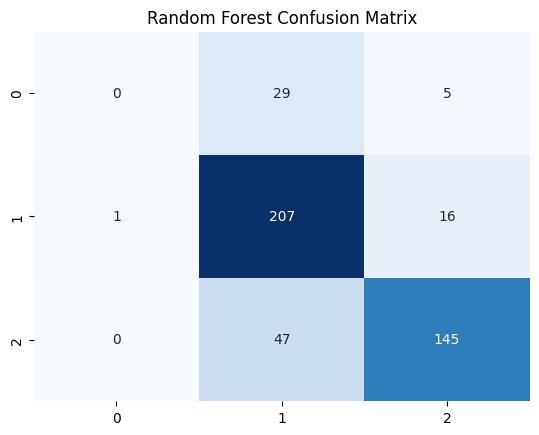

In [ ]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', rdm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

### Ada Boost

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

Accuracy = 59.56 %
Precision: 58.68936092955701 %
Recall: 59.55555555555555 %
F1 Score: 58.41409391895995 %


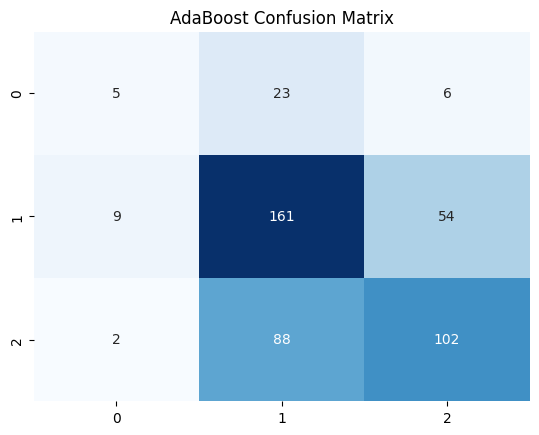

In [ ]:
y_pred_ada = ada_boost.predict(X_test)
ada_test_acc = round(accuracy_score(y_test, y_pred_ada) * 100, 2)

precision = precision_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', ada_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.show()


### Xg Boost

In [ ]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy = 76.44 %
Precision: 74.57071833577409 %
Recall: 76.44444444444444 %
F1 Score: 74.15000594222748 %


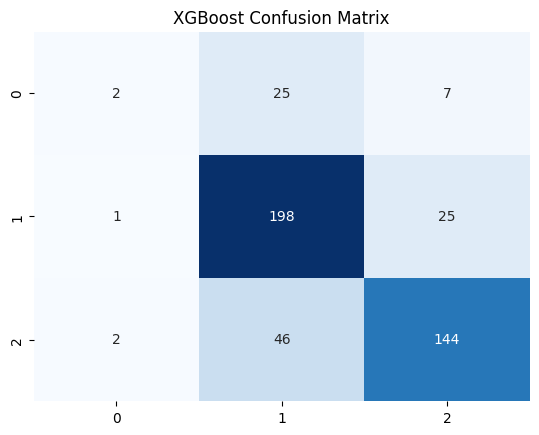

In [ ]:
y_pred_xgboost = xgboost_model.predict(X_test)
xgboost_test_acc = round(accuracy_score(y_test, y_pred_xgboost) * 100, 2)

precision = precision_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', xgboost_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Linear Support Vector Machines',
        'Kernel Support Vector Machines', 'Gaussian Naive Bayes','Decision Tree',
        'Random Forest', 'AdaBoost', 'XgBoost'
    ],
    'Model Accuracy Score': [
        svm_test_acc,svm_k_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc,ada_test_acc,xgboost_test_acc
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Accuracy Score
4,Random Forest,78.220000
0,Linear Support Vector Machines,77.330000
1,Kernel Support Vector Machines,76.890000
2,Gaussian Naive Bayes,76.440000
6,XgBoost,76.440000
3,Decision Tree,70.220000
5,AdaBoost,59.560000


## Plotting the Comparison Bar Graph

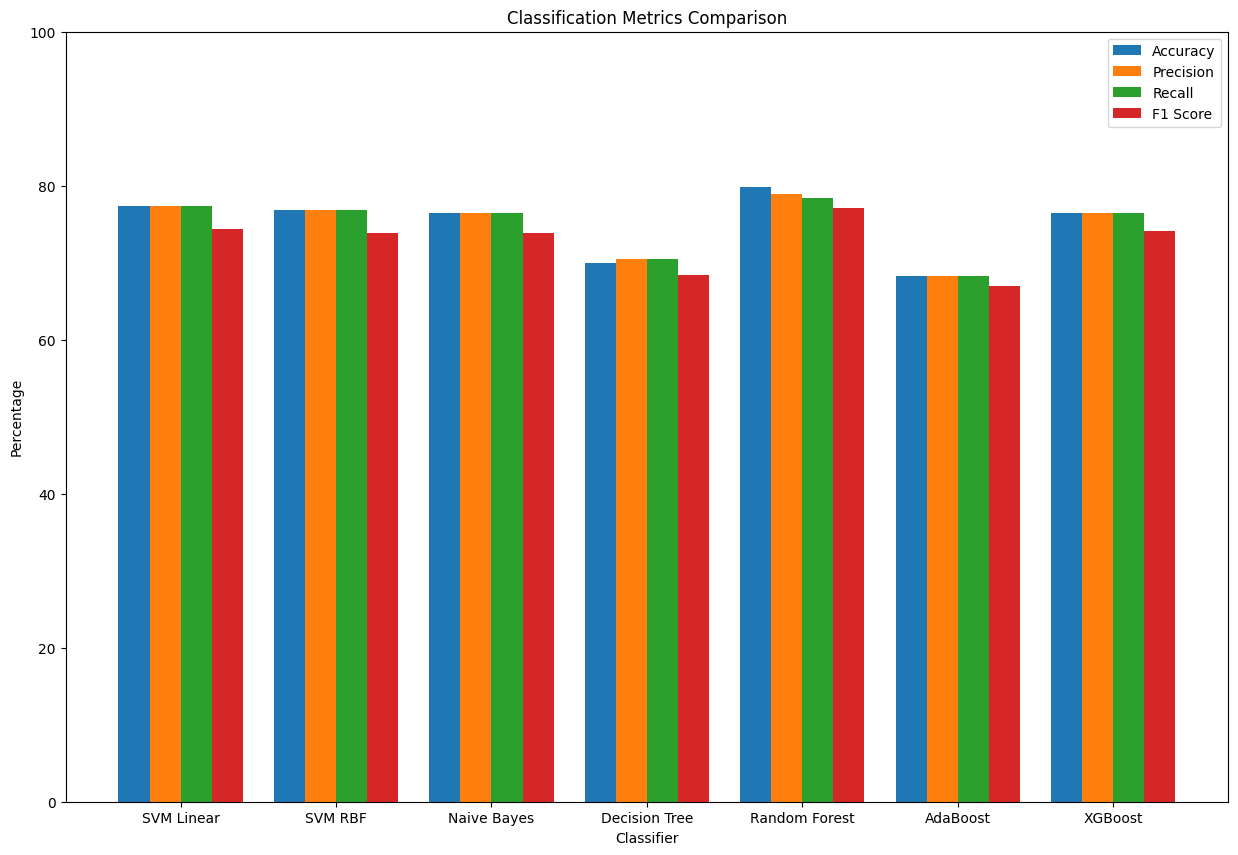

In [ ]:
classifiers = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
}

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(15, 10))

bar_width = 0.2
index = np.arange(len(classifiers))

# Create a grouped bar plot
for i, metric in enumerate(metrics_names):
    metric_values = [
        round(metric_score[1].fit(X_train, y_train).score(X_test, y_test) * 100, 2) if metric != 'F1 Score'
        else round(f1_score(y_test, metric_score[1].fit(X_train, y_train).predict(X_test), average='weighted', zero_division=1) * 100, 2)
        for metric_score in classifiers.items()
    ]

    plt.bar(index + i * bar_width, metric_values, label=f"{metric}", width=bar_width)

# Set the x-axis labels
plt.xticks(index + (len(metrics_names) - 1) * bar_width / 2, classifiers.keys())

# Set the y-axis limits
plt.ylim(0, 100)

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Percentage')
plt.title('Classification Metrics Comparison')

# Show the plot
plt.show()

# Ensemble Learn using Voting Classifier

In [ ]:
svm_model = SVC(kernel='linear')
svm_k_model = SVC(kernel='rbf')
nb_model = GaussianNB()
tree = DecisionTreeClassifier()
rdm_frst = RandomForestClassifier(n_estimators=100)
ada_boost = AdaBoostClassifier(n_estimators=100)
xgboost_model = xgb.XGBClassifier(n_estimators=100)

In [ ]:
ensemble_classifier = VotingClassifier(estimators=[
    ('LinearSVM', svm_model),
    ('KernelSVM', svm_k_model),
    ('NaiveBayes', nb_model),
    ('DecisionTree', tree),
    ('RandomForest', rdm_frst),
    ('AdaBoost', ada_boost),
    ('XGBoost', xgboost_model)
], voting='hard')

Ensemble Accuracy = 79.56 %
Precision: 0.8218039215686275
Recall: 0.7955555555555556
F1 Score: 0.7644553577518587


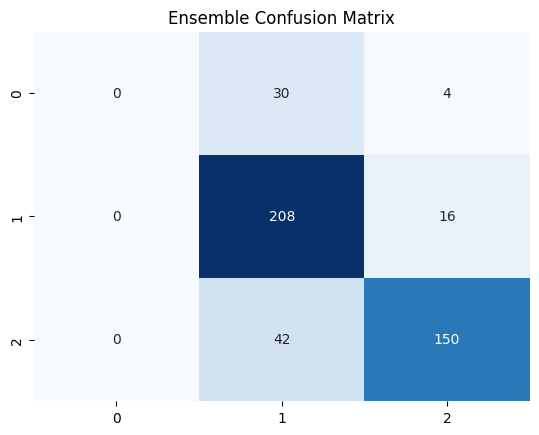

In [ ]:
ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_test)

ensemble_train_acc = round(accuracy_score(y_train, ensemble_classifier.predict(X_train)) * 100, 2)
ensemble_test_acc = round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)

precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Ensemble Accuracy =', ensemble_test_acc, '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.show()

# Classification


---



---
### Test size = 0.3


In [ ]:
X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Linear Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

Accuracy = 75.93 %
Precision: 73.82456662057749 %
Recall: 75.92592592592592 %
F1 Score: 74.46607507908773 %


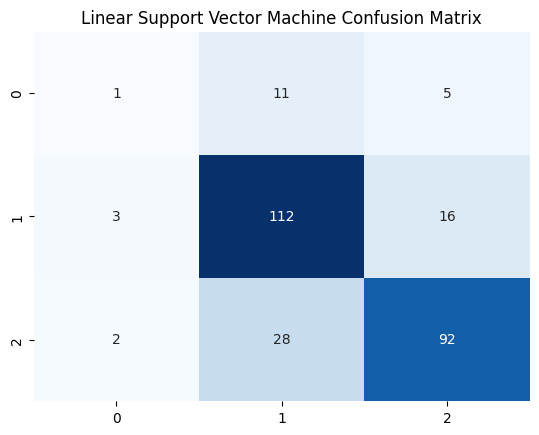

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

print('Accuracy =', svm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Linear Support Vector Machine Confusion Matrix')
plt.show()

### Kernel Support Vector Machine

In [ ]:
svm_kernel = SVC(kernel='rbf')
svm_kernel.fit(X_train,y_train)

SVC()

Accuracy = 77.04 %
Precision: 79.41015089163237 %
Recall: 77.03703703703704 %
F1 Score: 74.50381142382923 %


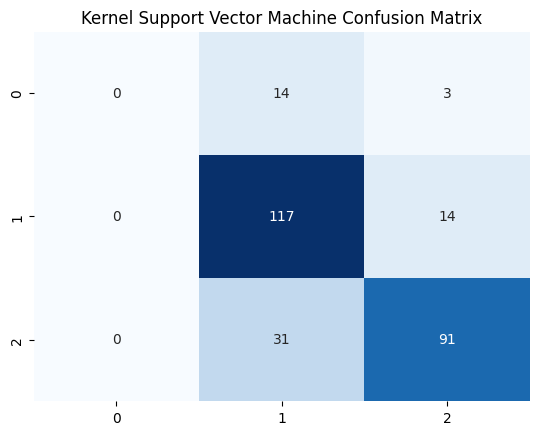

In [ ]:
y_pred = svm_kernel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_k_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', svm_k_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Kernel Support Vector Machine Confusion Matrix')
plt.show()

### Naive Byes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy = 73.33 %
Precision: 69.82767078565206 %
Recall: 73.33333333333333 %
F1 Score: 71.37239450547752 %


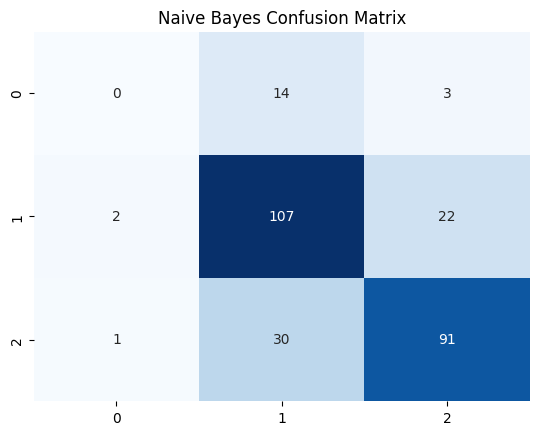

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', nb_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy = 69.26 %
Precision: 67.52063546835804 %
Recall: 69.25925925925925 %
F1 Score: 68.16948106774777 %


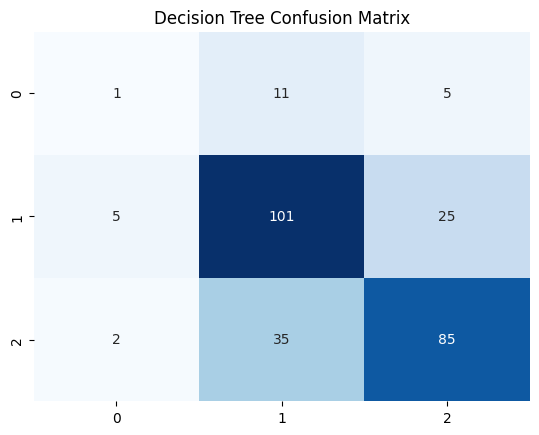

In [ ]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', tree_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Accuracy = 77.78 %
Precision: 74.6117711002407 %
Recall: 77.77777777777779 %
F1 Score: 75.69048808928869 %


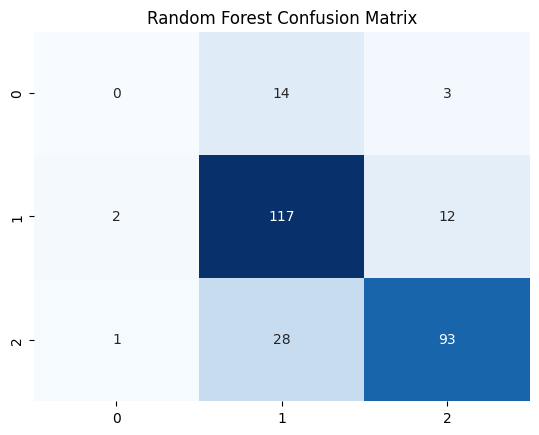

In [ ]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', rdm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

### Ada Boost

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

Accuracy = 61.11 %
Precision: 61.047820341532145 %
Recall: 61.111111111111114 %
F1 Score: 59.794817758844374 %


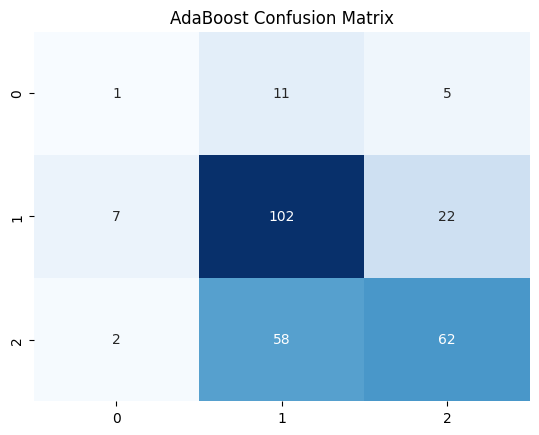

In [ ]:
y_pred_ada = ada_boost.predict(X_test)
ada_test_acc = round(accuracy_score(y_test, y_pred_ada) * 100, 2)

precision = precision_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', ada_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.show()


### Xg Boost

In [ ]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy = 77.04 %
Precision: 73.18541779004238 %
Recall: 77.03703703703704 %
F1 Score: 74.78198239900367 %


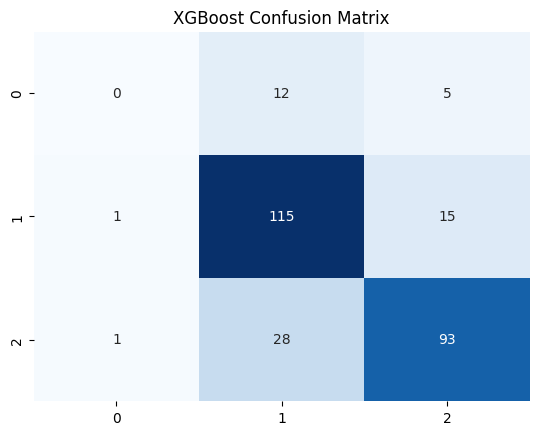

In [ ]:
y_pred_xgboost = xgboost_model.predict(X_test)
xgboost_test_acc = round(accuracy_score(y_test, y_pred_xgboost) * 100, 2)

precision = precision_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', xgboost_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Linear Support Vector Machines',
        'Kernel Support Vector Machines', 'Gaussian Naive Bayes','Decision Tree',
        'Random Forest', 'AdaBoost', 'XgBoost'
    ],
    'Model Accuracy Score': [
        svm_test_acc,svm_k_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc,ada_test_acc,xgboost_test_acc
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Accuracy Score
4,Random Forest,77.780000
1,Kernel Support Vector Machines,77.040000
6,XgBoost,77.040000
0,Linear Support Vector Machines,75.930000
2,Gaussian Naive Bayes,73.330000
3,Decision Tree,69.260000
5,AdaBoost,61.110000


## Plotting the Comparison Bar Graph

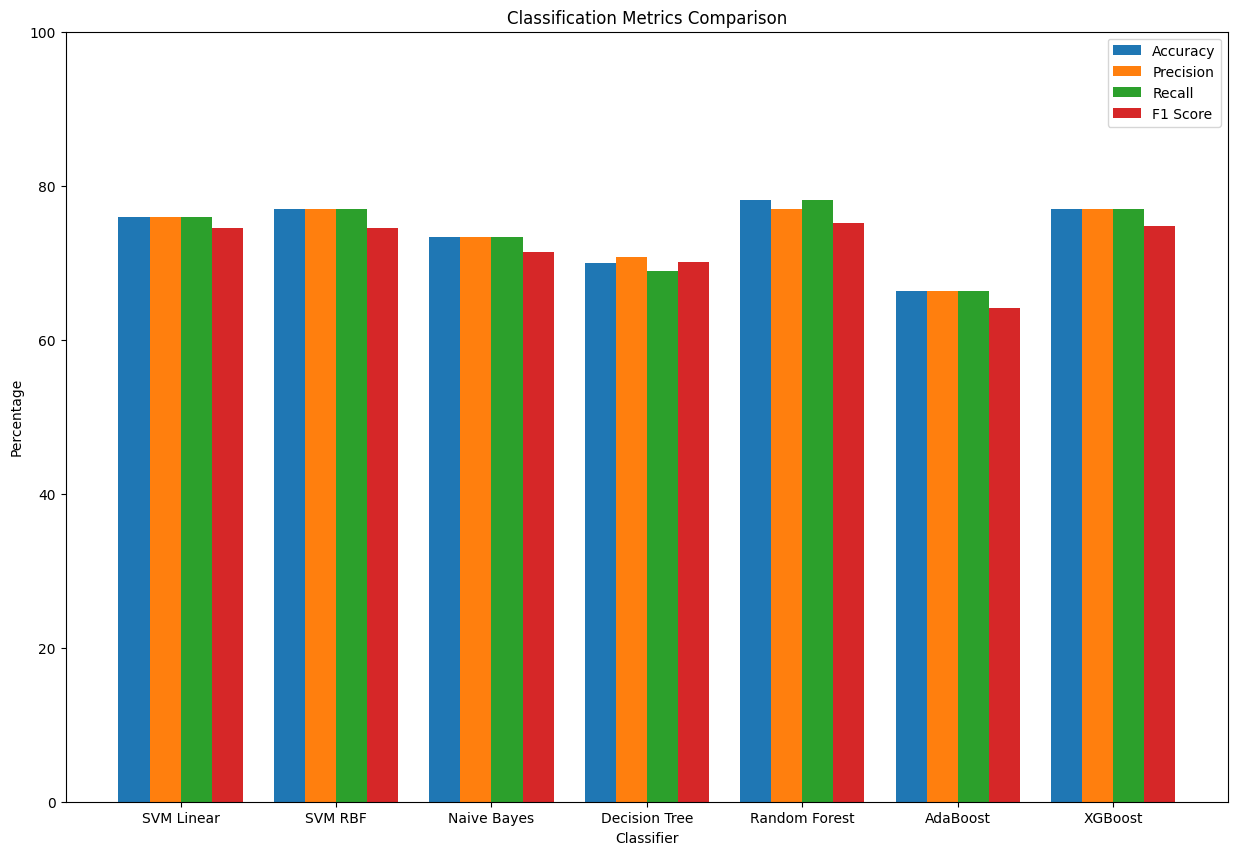

In [ ]:
classifiers = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
}

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(15, 10))

bar_width = 0.2
index = np.arange(len(classifiers))

# Create a grouped bar plot
for i, metric in enumerate(metrics_names):
    metric_values = [
        round(metric_score[1].fit(X_train, y_train).score(X_test, y_test) * 100, 2) if metric != 'F1 Score'
        else round(f1_score(y_test, metric_score[1].fit(X_train, y_train).predict(X_test), average='weighted', zero_division=1) * 100, 2)
        for metric_score in classifiers.items()
    ]

    plt.bar(index + i * bar_width, metric_values, label=f"{metric}", width=bar_width)

# Set the x-axis labels
plt.xticks(index + (len(metrics_names) - 1) * bar_width / 2, classifiers.keys())

# Set the y-axis limits
plt.ylim(0, 100)

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Percentage')
plt.title('Classification Metrics Comparison')

# Show the plot
plt.show()

# Ensemble Learn using Voting Classifier

In [ ]:
svm_model = SVC(kernel='linear')
svm_k_model = SVC(kernel='rbf')
nb_model = GaussianNB()
tree = DecisionTreeClassifier()
rdm_frst = RandomForestClassifier(n_estimators=100)
ada_boost = AdaBoostClassifier(n_estimators=100)
xgboost_model = xgb.XGBClassifier(n_estimators=100)

In [ ]:
ensemble_classifier = VotingClassifier(estimators=[
    ('LinearSVM', svm_model),
    ('KernelSVM', svm_k_model),
    ('NaiveBayes', nb_model),
    ('DecisionTree', tree),
    ('RandomForest', rdm_frst),
    ('AdaBoost', ada_boost),
    ('XGBoost', xgboost_model)
], voting='hard')

Ensemble Accuracy = 77.41 %
Precision: 0.7376917127119043
Recall: 0.774074074074074
F1 Score: 0.7499113224138189


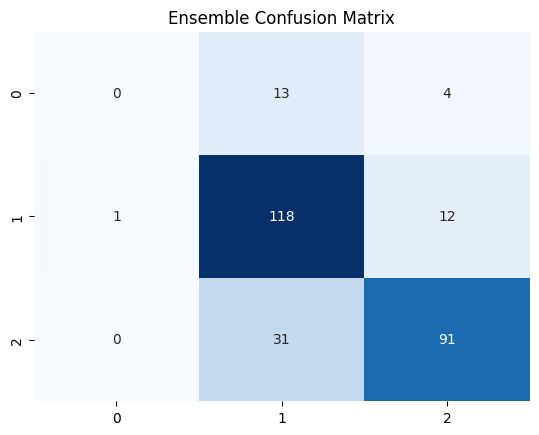

In [ ]:
ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_test)

ensemble_train_acc = round(accuracy_score(y_train, ensemble_classifier.predict(X_train)) * 100, 2)
ensemble_test_acc = round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)

precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Ensemble Accuracy =', ensemble_test_acc, '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.show()

# Classification


---



---
### Test size = 0.2


In [ ]:
X = df_no_outliers.iloc[:, :-1]
y = df_no_outliers.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Support Vector Machine

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

Accuracy = 77.22 %
Precision: 75.65592986603623 %
Recall: 77.22222222222223 %
F1 Score: 76.28268976302178 %


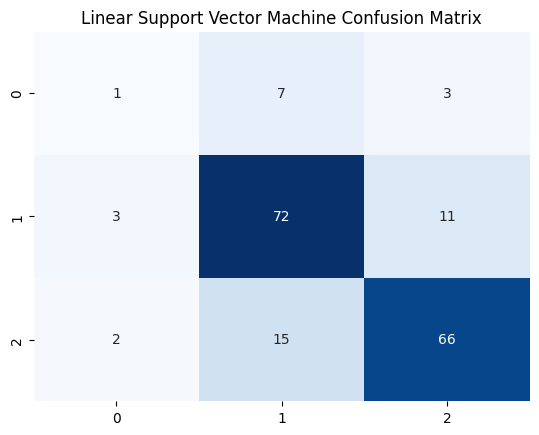

In [ ]:
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted')  # Specify average parameter
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average parameter
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average parameter

print('Accuracy =', svm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Linear Support Vector Machine Confusion Matrix')
plt.show()

### Kernel Support Vector Machine

In [ ]:
svm_kernel = SVC(kernel='rbf')
svm_kernel.fit(X_train,y_train)

SVC()

Accuracy = 80.0 %
Precision: 81.98830409356724 %
Recall: 80.0 %
F1 Score: 77.50899260730442 %


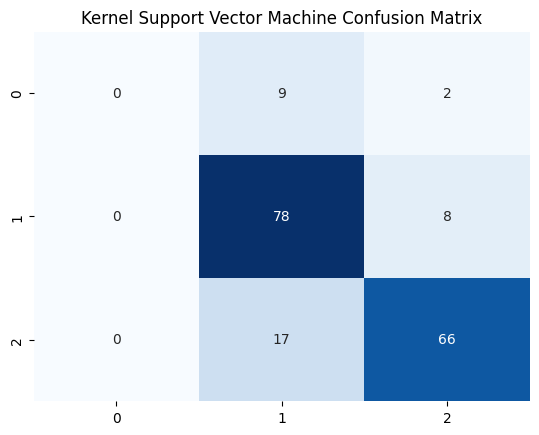

In [ ]:
y_pred = svm_kernel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
svm_k_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', svm_k_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Kernel Support Vector Machine Confusion Matrix')
plt.show()

### Naive Byes

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

Accuracy = 73.33 %
Precision: 69.83175248419151 %
Recall: 73.33333333333333 %
F1 Score: 71.47311947311948 %


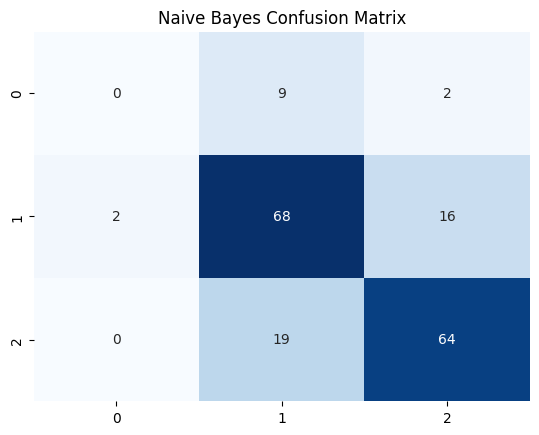

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', nb_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy = 67.78 %
Precision: 68.31924315619969 %
Recall: 67.77777777777779 %
F1 Score: 67.94382329717058 %


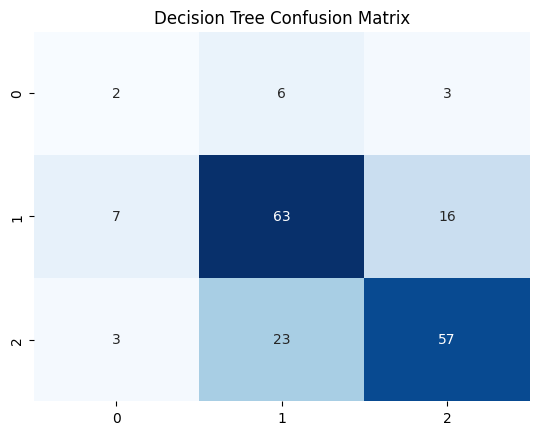

In [ ]:
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tree_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', tree_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
rdm_frst = RandomForestClassifier(n_estimators=100)
rdm_frst.fit(X_train,y_train)

RandomForestClassifier()

Accuracy = 80.56 %
Precision: 77.54827456429852 %
Recall: 80.55555555555556 %
F1 Score: 78.71833391256256 %


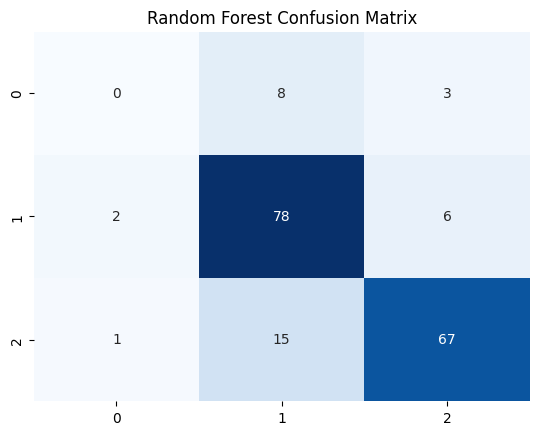

In [ ]:
y_pred = rdm_frst.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rdm_test_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', rdm_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

### Ada Boost

In [ ]:
ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

Accuracy = 70.56 %
Precision: 69.60369617585064 %
Recall: 70.55555555555556 %
F1 Score: 70.04394825447456 %


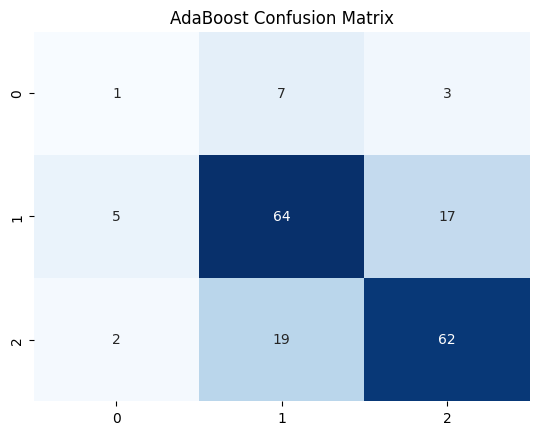

In [ ]:
y_pred_ada = ada_boost.predict(X_test)
ada_test_acc = round(accuracy_score(y_test, y_pred_ada) * 100, 2)

precision = precision_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ada, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', ada_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.show()


### Xg Boost

In [ ]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy = 76.67 %
Precision: 74.1859649122807 %
Recall: 76.66666666666667 %
F1 Score: 75.13762088320823 %


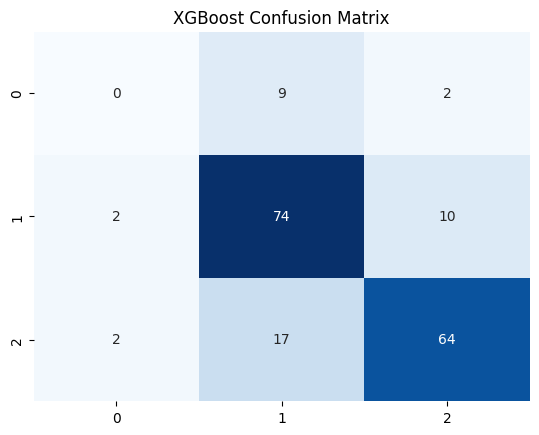

In [ ]:
y_pred_xgboost = xgboost_model.predict(X_test)
xgboost_test_acc = round(accuracy_score(y_test, y_pred_xgboost) * 100, 2)

precision = precision_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_xgboost, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Accuracy =', xgboost_test_acc, '%')
print('Precision:', precision*100, '%')
print('Recall:', recall*100, '%')
print('F1 Score:', f1*100, '%')

cm_xgboost = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm_xgboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.show()

# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Linear Support Vector Machines',
        'Kernel Support Vector Machines', 'Gaussian Naive Bayes','Decision Tree',
        'Random Forest', 'AdaBoost', 'XgBoost'
    ],
    'Model Accuracy Score': [
        svm_test_acc,svm_k_test_acc,nb_test_acc,tree_test_acc,rdm_test_acc,ada_test_acc,xgboost_test_acc
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='coolwarm')

,Model,Model Accuracy Score
4,Random Forest,80.560000
1,Kernel Support Vector Machines,80.000000
0,Linear Support Vector Machines,77.220000
6,XgBoost,76.670000
2,Gaussian Naive Bayes,73.330000
5,AdaBoost,70.560000
3,Decision Tree,67.780000


## Plotting the Comparison Bar Graph

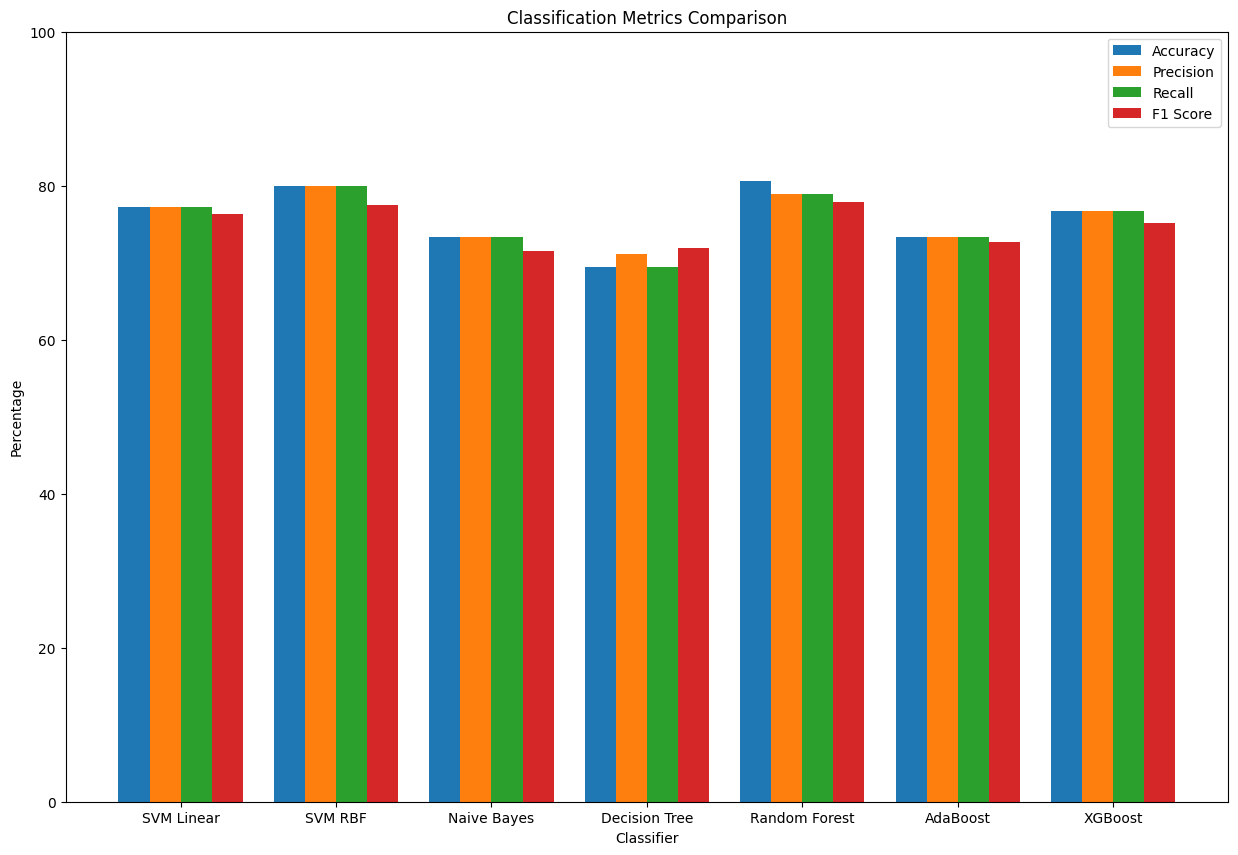

In [ ]:
classifiers = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM RBF': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
}

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(15, 10))

bar_width = 0.2
index = np.arange(len(classifiers))

# Create a grouped bar plot
for i, metric in enumerate(metrics_names):
    metric_values = [
        round(metric_score[1].fit(X_train, y_train).score(X_test, y_test) * 100, 2) if metric != 'F1 Score'
        else round(f1_score(y_test, metric_score[1].fit(X_train, y_train).predict(X_test), average='weighted', zero_division=1) * 100, 2)
        for metric_score in classifiers.items()
    ]

    plt.bar(index + i * bar_width, metric_values, label=f"{metric}", width=bar_width)

# Set the x-axis labels
plt.xticks(index + (len(metrics_names) - 1) * bar_width / 2, classifiers.keys())

# Set the y-axis limits
plt.ylim(0, 100)

# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Percentage')
plt.title('Classification Metrics Comparison')

# Show the plot
plt.show()

# Ensemble Learn using Voting Classifier

In [ ]:
svm_model = SVC(kernel='linear')
svm_k_model = SVC(kernel='rbf')
nb_model = GaussianNB()
tree = DecisionTreeClassifier()
rdm_frst = RandomForestClassifier(n_estimators=100)
ada_boost = AdaBoostClassifier(n_estimators=100)
xgboost_model = xgb.XGBClassifier(n_estimators=100)

In [ ]:
ensemble_classifier = VotingClassifier(estimators=[
    ('LinearSVM', svm_model),
    ('KernelSVM', svm_k_model),
    ('NaiveBayes', nb_model),
    ('DecisionTree', tree),
    ('RandomForest', rdm_frst),
    ('AdaBoost', ada_boost),
    ('XGBoost', xgboost_model)
], voting='hard')

Ensemble Accuracy = 77.22 %
Precision: 0.7399813860252004
Recall: 0.7722222222222223
F1 Score: 0.7545930321350214


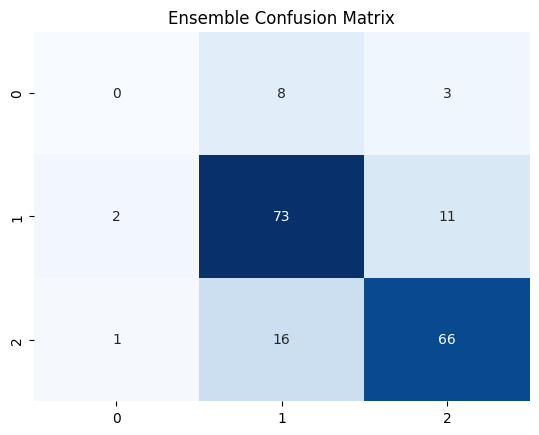

In [ ]:
ensemble_classifier.fit(X_train, y_train)

y_pred_ensemble = ensemble_classifier.predict(X_test)

ensemble_train_acc = round(accuracy_score(y_train, ensemble_classifier.predict(X_train)) * 100, 2)
ensemble_test_acc = round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)

precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
recall = recall_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter
f1 = f1_score(y_test, y_pred_ensemble, average='weighted', zero_division=1)  # Specify zero_division parameter

print('Ensemble Accuracy =', ensemble_test_acc, '%')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Ensemble Confusion Matrix')
plt.show()